<a href="https://www.kaggle.com/code/sanmioduntan/predicting-heart-attack-occurrence?scriptVersionId=98322220" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


Heart attack is a colloquial name for a condition,Myocardial Infarction, which is charcateristized by reduction in blood flow to the muscles of the heart via the coronary arteries,leading to tissue injury and subsequently tissue death. Approximately 1.5 million cases of Heart attack occur in the United States,death resulting from Coronary Artery disease is the leading cause of death in the United States and Europe.
Early detection,and prompt treatment can help prevent death alongside identifying risks early and carrying out other preventive measures such as lifestyle changes, treatment of comorbidities,and pharmacological intervention.Symptoms include chest pain, fatigue, lightheadness, syncope,shortness of breath etc.

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import numpy as np
%matplotlib inline
from sklearn.preprocessing import OrdinalEncoder

This dataset gotten on kaggle held my interest because heart attack can sometimes present with no symptoms, causing a "silent heart attack" and this is seen in 45% cases. Using this historical dataset, we can identify risks associated with heart attack,predict what factors are most important in identifying persons at risk and possibly increase response and suspicion index which may result in less mortality due to Coronary artery disease.
I will be using the data set to answer the following questions 
Among the population recorded, what is the frequency of coronary artery disease
what are the relationships between the variables measured and coronary artery disease
what factors are most important in determining incidence of coronary artery disease  


In [3]:
df = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')

In [4]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Data introduction : The dataset contains 13 independent variables and one dependet variable which is recorded as 'output' and stands for a diagnaosis of coronary artery disease.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


metadata = """
Age : Age of the patient(15-77)

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca:number of major vessels colored by fluoroscopy 
(0-3)

cp : Chest Pain type \n
Value 1: typical angina\n
Value 2: atypical angina\n
Value 3: non-anginal pain\n
Value 4: asymptomatic\n

thall: Thalladium Stress test 
0: no defect
1: fixed defect 
2 : Reversible defect 

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results \n
Value 0: normal \n
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)\n
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria\n

thalach : maximum heart rate achieved \n
target : 0= less chance of heart attack 1= more chance of heart attack \n

Old peak : ST depression induced by exercise relative to rest
caa :coronary artery anomaly \n
slp: slope of ecg?.

Value 0:Downsloping 
Value 1: Flat
Value 2:Upsloping """

In [6]:
df.duplicated().sum()

1

Data cleaning: Column names were changed from abbrevaitions to aid understanding. A single duplicate data was removed, no missing values were recorded.I also ensured that there were no outliers and/ or misformatted values.

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.shape

(302, 14)

In [9]:
df.rename(columns = {'cp':'Chest_Pain_type'},inplace = True )
df.rename(columns ={'exng': 'Exercise_induced_Angina'},inplace = True)
df.rename(columns = {'trtbps':'Resting_Blood_Pressure'},inplace = True) 
df.rename(columns = {'fbs':'Fasting_blood_sugar'},inplace = True )
df.rename(columns = {'chol':'Serum_Cholesterol'},inplace = True )
df.rename(columns = {'restecg':'Resting_ECG'},inplace = True )
df.rename(columns = {'thalachh':'Maximum_Heart_Rate'},inplace = True )
df.rename(columns = {'slp':'ECG_Slope'},inplace = True )
df.rename(columns = {'caa':'Coronary_artery_abnormality'},inplace = True )
df.rename(columns = {'thall':'Thalladium_test'},inplace = True )

In [10]:
df

,age,sex,Chest_Pain_type,Resting_Blood_Pressure,Serum_Cholesterol,Fasting_blood_sugar,Resting_ECG,Maximum_Heart_Rate,Exercise_induced_Angina,oldpeak,ECG_Slope,Coronary_artery_abnormality,Thalladium_test,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [11]:
background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]

 **Among the population recorded, what is the frequency of coronary artery disease ? **

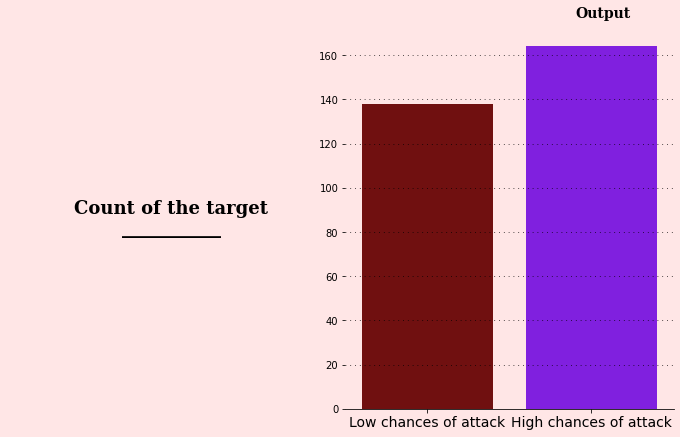

In [12]:
fig = plt.figure(figsize=(18,7))
gs = fig.add_gridspec(1,3)
gs.update(wspace=0.03, hspace=0.05)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 

# Title of the plot
ax0.text(0.5,0.5,"Count of the target\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Target Count
ax1.text(0.9,177,"Output",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df, x = 'output',palette = color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Low chances of attack","High chances of attack"],fontsize = 14)

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)



What are the relationships between the variables measured and coronary artery disease
In this data , two types of independent variables are recorded: Quantitative variables and categorical/qualitative variables
Quantitative variables take numerical values, and represent some kind of measurement. They can be further divided into subcategories:continous and discrete 
Categorical variables take category or label values, and place an individual into one of several groups.

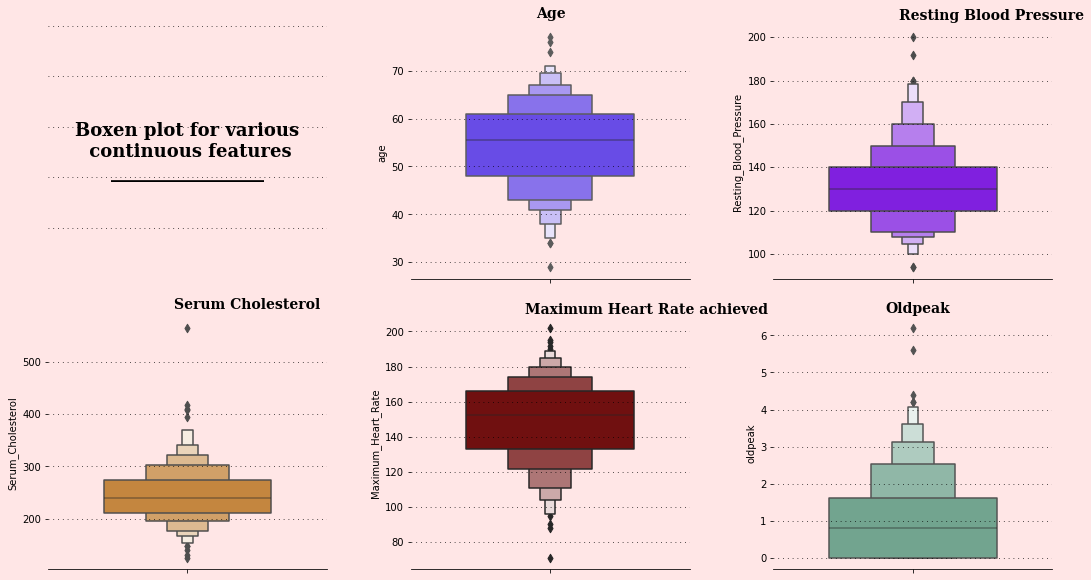

In [13]:
#univariate analysis of continuous features

fig2 = plt.figure(figsize=(18,10))
gs = fig2.add_gridspec(2,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig2.add_subplot(gs[0,0])
ax1 = fig2.add_subplot(gs[0,1])
ax2 = fig2.add_subplot(gs[0,2])
ax3 = fig2.add_subplot(gs[1,0])
ax4 = fig2.add_subplot(gs[1,1])
ax5 = fig2.add_subplot(gs[1,2])

axes = [ax0,ax1,ax2,ax3,ax4,ax5]

fig2.patch.set_facecolor(background_color) 
for a in axes:
    a.set_facecolor(background_color)
    a.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    
# Title of the plot
for s in ["top","right",'bottom',"left"]: 
        ax0.spines[s].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Boxen plot for various\n continuous features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Age 
ax1.text(-0.05, 81, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
sns.boxenplot(ax=ax1,y=df['age'],palette=["#5833ff"],width=0.6)


# Trtbps 
ax2.text(-0.05, 208, 'Resting Blood Pressure', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
sns.boxenplot(ax=ax2,y=df['Resting_Blood_Pressure'],palette=["#8000ff"],width=0.6)

# Chol 
ax3.text(-0.05, 600, 'Serum Cholesterol', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
sns.boxenplot(ax=ax3,y=df['Serum_Cholesterol'],palette=["#da8829"],width=0.6)


# Thalachh 
ax4.text(-0.09, 210, 'Maximum Heart Rate achieved', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
sns.boxenplot(ax=ax4,y=df['Maximum_Heart_Rate'],palette=["#800000"],width=0.6)


# oldpeak 
ax5.text(-0.1, 6.6, 'Oldpeak', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
sns.boxenplot(ax=ax5,y=df['oldpeak'],palette=["#6aac90"],width=0.6)


for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

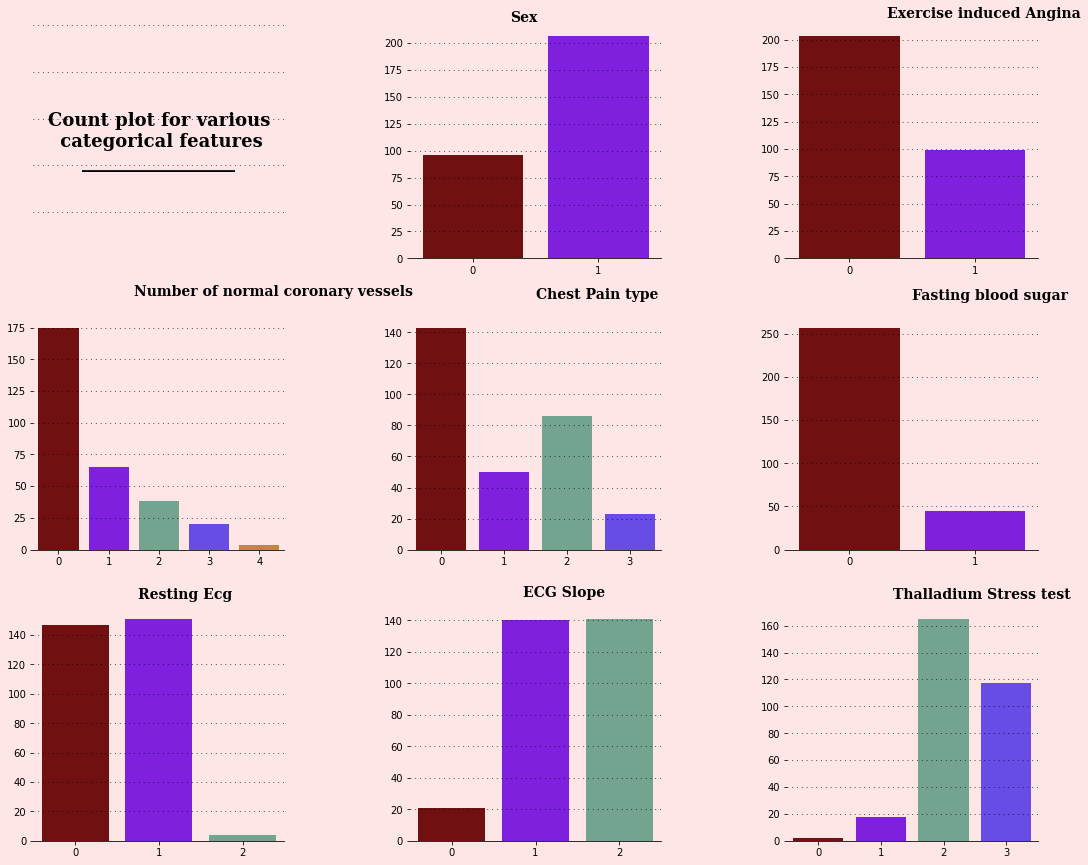

In [14]:
#univariate analysis of categorical variables
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

axes = [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]
fig.patch.set_facecolor(background_color) 

for a in axes:
    a.set_facecolor(background_color)
    a.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    a.set_xlabel(" ")
    a.set_ylabel(" ")
    
for s in ["top","right",'bottom',"left"]: 
        ax0.spines[s].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plot for various\n categorical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Sex count
ax1.text(0.3, 220, 'Sex', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
sns.countplot(ax=ax1,data=df,x='sex',palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")
# Exng count
ax2.text(0.3, 220, 'Exercise induced Angina', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
sns.countplot(ax=ax2,data=df,x='Exercise_induced_Angina',palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Caa count
ax3.text(1.5, 200, 'Number of normal coronary vessels', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
sns.countplot(ax=ax3,data=df,x='Coronary_artery_abnormality',palette=color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Cp count
ax4.text(1.5, 162, 'Chest Pain type', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
sns.countplot(ax=ax4,data=df,x='Chest_Pain_type',palette=color_palette)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Fbs count
ax5.text(0.5, 290, 'Fasting blood sugar', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
sns.countplot(ax=ax5,data=df,x='Fasting_blood_sugar',palette=color_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Restecg count
ax6.text(0.75, 165, 'Resting Ecg', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
sns.countplot(ax=ax6,data=df,x='Resting_ECG',palette=color_palette)
ax6.set_xlabel("")
ax6.set_ylabel("")

# Slp count
ax7.text(0.85, 155, 'ECG Slope', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
sns.countplot(ax=ax7,data=df,x='ECG_Slope',palette=color_palette)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thall count
ax8.text(1.2, 180, 'Thalladium Stress test', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
sns.countplot(ax=ax8,data=df,x='Thalladium_test',palette=color_palette)
ax8.set_xlabel("")
ax8.set_ylabel("")
for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

Univariate analysis

Most of the patients have age (50–60).In which maximum number of Patients have age 56.

Around 68.2% (207) are Male patients and 31.8% (96) are Female patients .

Most of the patients have type Value 1 Chest Pain that is typical angina Value.

Most of the patients' blood pressure lies between the range (120–140).

Most of the patients' serum cholesterol level lies between the range (200–250).

Most of the patients' maximum heart Rate lies between the range (155–165)

Most of the patients(48.5%) had normal ECG results

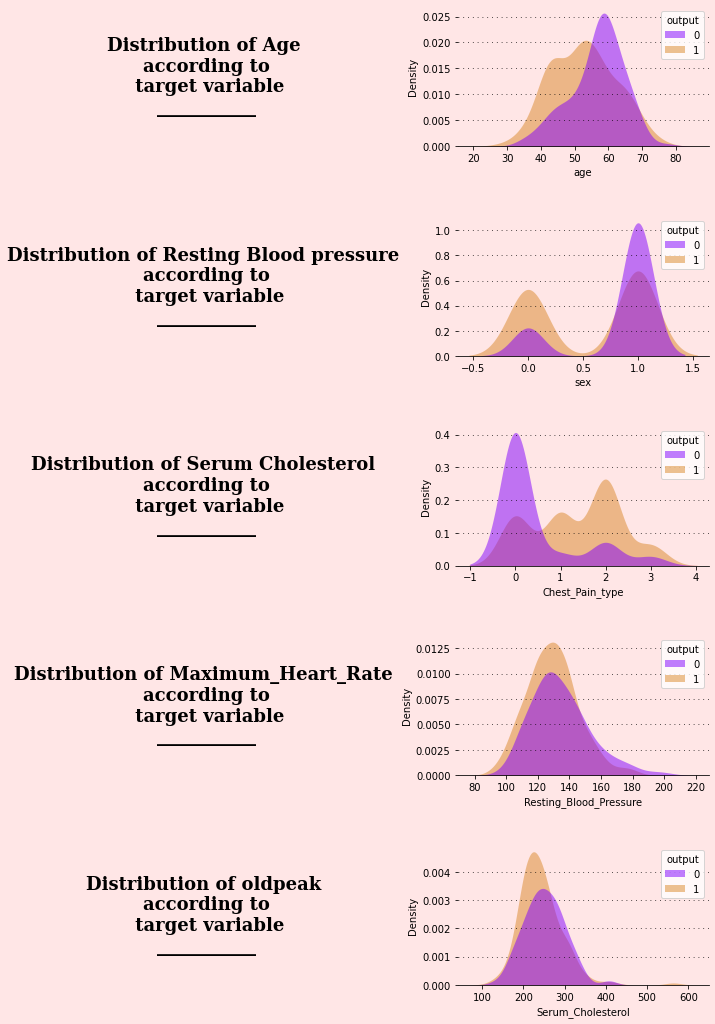

In [15]:
#multivariate analysis of continous variables
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(5,3)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])


axes = [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

fig.patch.set_facecolor(background_color) 
for a in axes:
    a.set_facecolor(background_color)


    


var = ['Age','Resting Blood pressure','Serum Cholesterol','Maximum_Heart_Rate','oldpeak'] 
axe = [ax0,ax2,ax4,ax6,ax8]
i = 0
for a in axe:
   
        a.text(0.5,0.5,"Distribution of " + var[i]+ " \naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
        i = i + 1
        a.spines["bottom"].set_visible(False)
        a.set_xticklabels([])
        a.set_yticklabels([])
        a.tick_params(left=False, bottom=False)

axs = [ax1,ax3,ax5,ax7,ax9]
i = 0
for a in axs:
    a.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    sns.kdeplot(ax=a, data=df, x =df.columns[i],hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
    i = i + 1

for k in ["top","left","right"]:
    ax0.spines[k].set_visible(False)
    ax1.spines[k].set_visible(False)
    ax2.spines[k].set_visible(False)
    ax3.spines[k].set_visible(False)
    ax4.spines[k].set_visible(False)
    ax5.spines[k].set_visible(False)
    ax6.spines[k].set_visible(False)
    ax7.spines[k].set_visible(False)
    ax8.spines[k].set_visible(False)
    ax9.spines[k].set_visible(False)

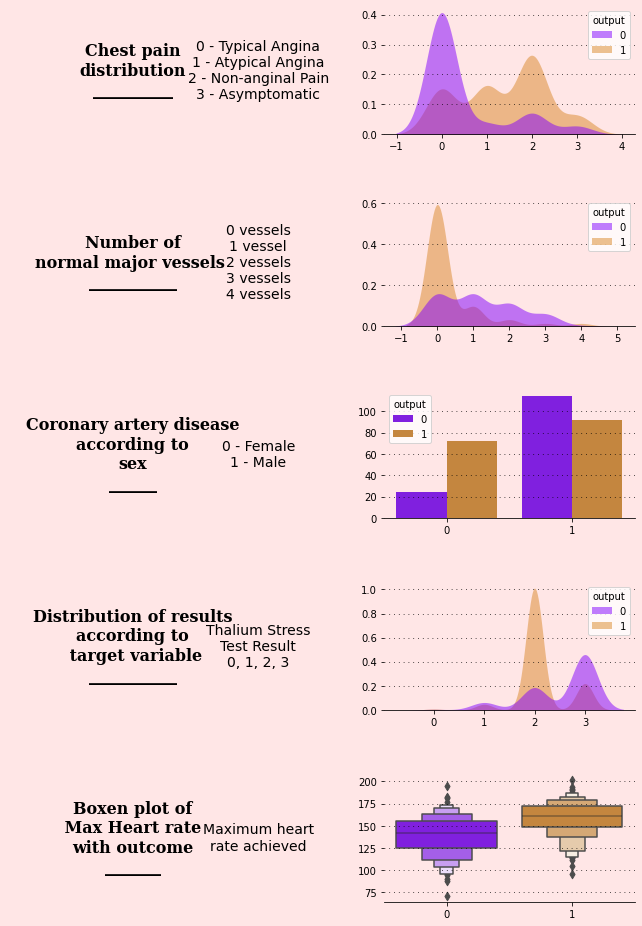

In [16]:
#multivariable analysis of categorical features 
fig = plt.figure(figsize=(18,20))
gs = fig.add_gridspec(6,3)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])




fig.patch.set_facecolor(background_color) 
axes = [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]
for a in axes:
    a.set_facecolor(background_color) 


# Cp title
# 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
ax0.text(0.5,0.5,"Chest pain\ndistribution\n__________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 16,
        fontweight='bold',
        fontfamily='serif',
        )
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.text(1,.5,"0 - Typical Angina\n1 - Atypical Angina\n2 - Non-anginal Pain\n3 - Asymptomatic",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

# Cp
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='Chest_Pain_type',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Caa title
ax2.text(0.5,0.5,"Number of\nnormal major vessels \n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 16,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.text(1,.5,"0 vessels\n1 vessel\n2 vessels\n3 vessels\n4 vessels",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# Caa
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='Coronary_artery_abnormality',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Sex title
ax4.text(0.5,0.5,"Coronary artery disease\naccording to\nsex\n______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 16,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.text(1,.5,"0 - Female\n1 - Male",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Sex
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='sex',palette=["#8000ff","#da8829"], hue='output')
ax5.set_xlabel("")
ax5.set_ylabel("")

# Thall title
ax6.text(0.5,0.5,"Distribution of results\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 16,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.text(1,.5,"Thalium Stress\nTest Result\n0, 1, 2, 3",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Thall
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df, x='Thalladium_test',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thalachh title
ax8.text(0.5,0.5,"Boxen plot of\n Max Heart rate \nwith outcome\n_______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 16,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.text(1,.5,"Maximum heart\nrate achieved",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Thalachh
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax9, data=df,x='output',y='Maximum_Heart_Rate',palette=["#8000ff","#da8829"])
ax9.set_xlabel("")
ax9.set_ylabel("")






for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)
    

Multivariate analysis 

While occurence of  coronary artery disease is highest in particular age groups, the data shows that a higher number of patients within the same age do not suffer any  coronary artery disease.

Higher resting blood pressure is shown to have a high correlation with incidence of  coronary artery disease.

High serum cholesterol (200–300) is very strongly associated with incidence of coronary artery disease.

Higher maximum heart rates (150–200) correspond to higher likelihoods of coronary artery disease 

There is a negative correlation between old peak(ST depression induced by exercise relative to rest) and incidence of coronary artery disease

# Predictive Analysis

**What factors are most important in determining incidence of coronary artery disease**
To answer this question using machine learning methods, in 3 steps 
scaling
test-train splitting 
calculating prediction scores 

Scaling: Different scales of the data features affect the modeling of a dataset adversely. It leads to a biased outcome of predictions in terms of misclassification error and accuracy rates. Thus, it is necessary to Scale the data prior to modeling. As the data also contains both quantitative and categorical data,dummies of the categorical data will be created to convert them to numerical values that can be easily understood by the model 

Test-train splitting: a method of model validation where a small subset of random data is given to the model( in this case 0.3 of the total) to see how the model performs 

Calculating prediction scores : the scores help us see clearly which models accurately make the best predictions using the data recalled.

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [18]:

df1 = df

# define the columns to be encoded and scaled
cat_cols = ['Coronary_artery_abnormality','Chest_Pain_type','Resting_ECG','ECG_Slope','Thalladium_test']
con_cols = ["age","Resting_Blood_Pressure","Serum_Cholesterol","Maximum_Heart_Rate","oldpeak"]

# encoding the categorical columns
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

# defining the features and target
X = df1.drop(['output'],axis=1)
y = df1[['output']]



In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.35, random_state = 42)

In [20]:
# instantiating the scaler
scaler =StandardScaler()

# scaling the continuous featuree
d = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
names = X.columns
scaled = pd.DataFrame(d, columns=names)
scaled.head()

,age,sex,Resting_Blood_Pressure,Serum_Cholesterol,Fasting_blood_sugar,Maximum_Heart_Rate,Exercise_induced_Angina,oldpeak,Coronary_artery_abnormality_1,Coronary_artery_abnormality_2,...,Chest_Pain_type_1,Chest_Pain_type_2,Chest_Pain_type_3,Resting_ECG_1,Resting_ECG_2,ECG_Slope_1,ECG_Slope_2,Thalladium_test_1,Thalladium_test_2,Thalladium_test_3
0,-0.527101,-1.341641,-0.699611,-0.053260,-0.391077,0.578061,-0.688247,0.051539,-0.530137,-0.36462,...,2.399713,-0.664211,-0.308175,1.052391,-0.101535,-0.921443,1.063219,-0.243843,0.921443,-0.813029
1,0.816064,-1.341641,-0.472773,-0.687571,-0.391077,0.622914,-0.688247,-0.923189,-0.530137,-0.36462,...,-0.416717,-0.664211,-0.308175,1.052391,-0.101535,-0.921443,1.063219,-0.243843,0.921443,-0.813029
2,1.151856,0.745356,-0.699611,-1.267513,-0.391077,-0.408716,-0.688247,-0.568742,-0.530137,-0.36462,...,-0.416717,-0.664211,-0.308175,1.052391,-0.101535,-0.921443,1.063219,-0.243843,-1.085255,1.229968
3,0.256412,0.745356,1.001676,0.526682,-0.391077,-1.664613,1.452966,-0.391519,1.886303,-0.36462,...,-0.416717,-0.664211,-0.308175,-0.950217,-0.101535,1.085255,-0.940540,4.100998,-1.085255,-0.813029
4,-1.758336,-1.341641,0.321161,-0.488216,-0.391077,0.129526,-0.688247,-0.923189,-0.530137,-0.36462,...,-0.416717,1.505545,-0.308175,1.052391,-0.101535,1.085255,-0.940540,-0.243843,0.921443,-0.813029


In [21]:
models = [RandomForestClassifier(), KNeighborsClassifier(), SVC(), LogisticRegression()]


for a in models:
    a.fit(X_train, y_train)
    y_pred = a.predict(X_test)

    a = print(f'model: {str(a)}')
    b= print(classification_report(y_test,y_pred, zero_division=1))
    c = print('-'*30, '\n')
    

model: RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.86      0.82      0.84        45
           1       0.87      0.90      0.89        61

    accuracy                           0.87       106
   macro avg       0.87      0.86      0.86       106
weighted avg       0.87      0.87      0.87       106

------------------------------ 

model: KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.42      1.00      0.60        45
           1       1.00      0.00      0.00        61

    accuracy                           0.42       106
   macro avg       0.71      0.50      0.30       106
weighted avg       0.76      0.42      0.25       106

------------------------------ 

model: SVC()
              precision    recall  f1-score   support

           0       0.42      1.00      0.60        45
           1       1.00      0.00      0.00        61

    accuracy                           0.

In [22]:
FinalM= RandomForestClassifier()
FinalM.fit(X_train, y_train)
y_pred = FinalM.predict(X_test)
print(classification_report(y_test,y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80        45
           1       0.84      0.89      0.86        61

    accuracy                           0.84       106
   macro avg       0.84      0.83      0.83       106
weighted avg       0.84      0.84      0.84       106




Confusion matrix visualizes and summarizes the performance of a classification algorithm, (in this case Random Forest Classifier). For example, in this case Random Forest Classifier predicted high risk of heart attack 46 times, in 37 cases, it got it right(True positive)and 9 times it got the prediction inaccurately(False positive).

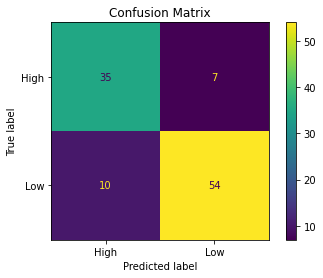

In [23]:
cm = confusion_matrix(FinalM.predict(X_test),y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["High","Low",])
a = disp.plot()
plt.title("Confusion Matrix")
plt.show()



In [24]:
feature_importances=FinalM.feature_importances_
feature_importances_df=pd.DataFrame({'features':list(X_train), 'feature_importances':feature_importances})
feature_importances_df=pd.DataFrame({'features':list(X_train), 'feature_importances':feature_importances})
feature_importances_df.sort_values('feature_importances',ascending=False)




,features,feature_importances
5,Maximum_Heart_Rate,0.139028
7,oldpeak,0.121523
20,Thalladium_test_2,0.100740
0,age,0.082181
2,Resting_Blood_Pressure,0.074514
3,Serum_Cholesterol,0.074040
21,Thalladium_test_3,0.062459
6,Exercise_induced_Angina,0.048914
13,Chest_Pain_type_2,0.042718
8,Coronary_artery_abnormality_1,0.036110


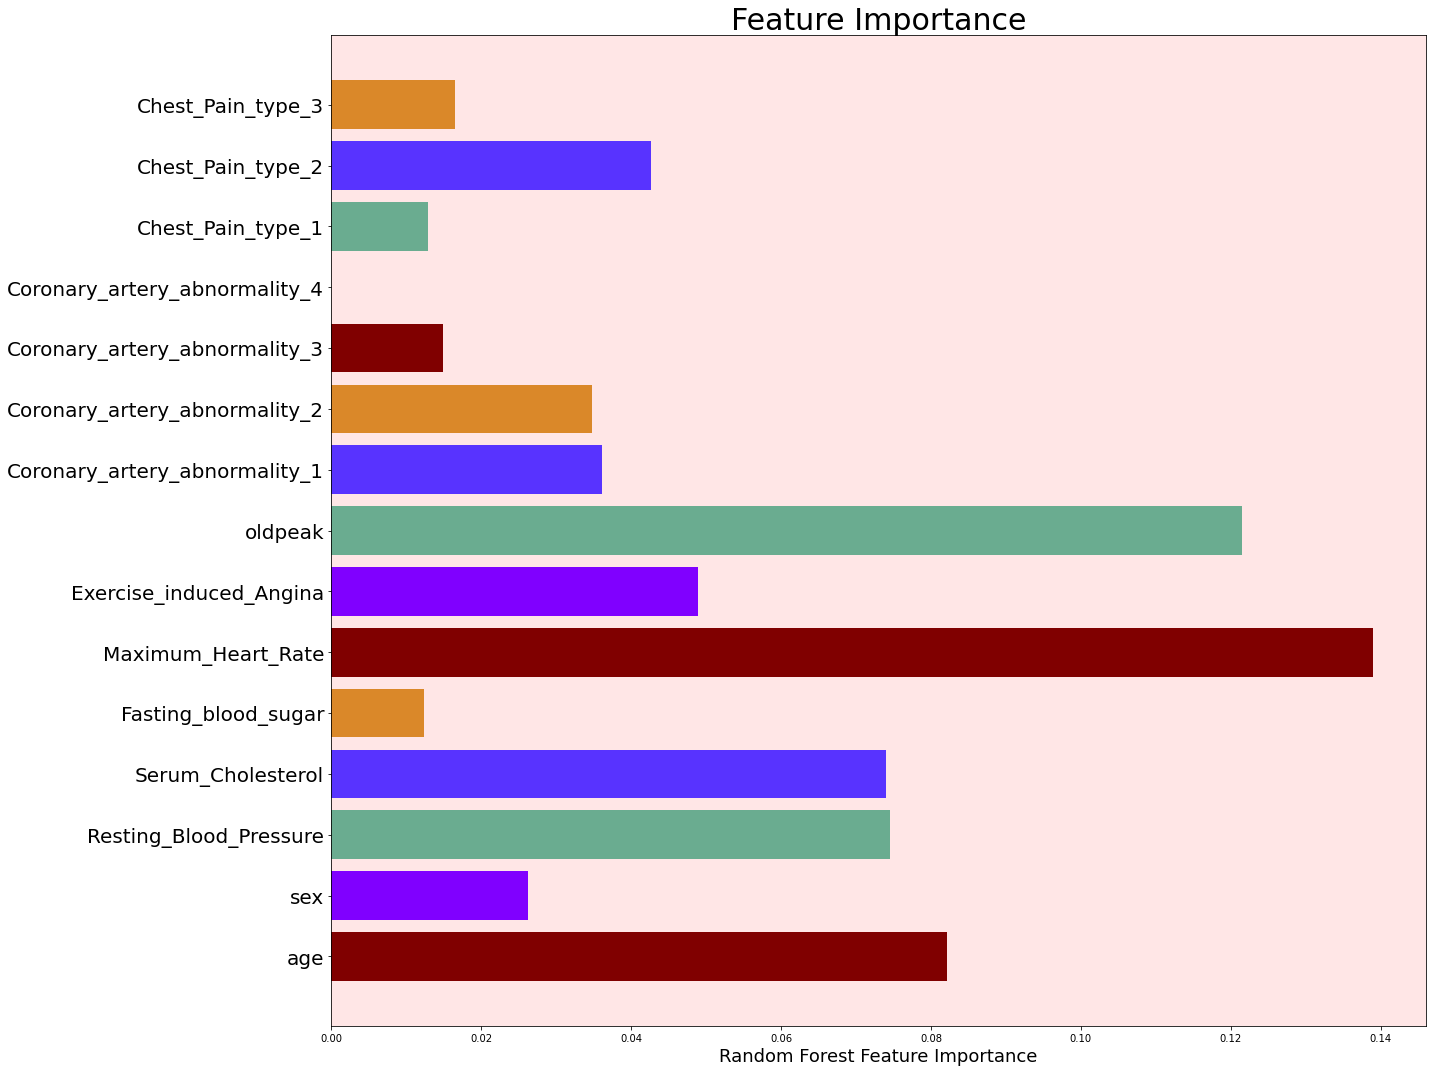

In [25]:
plt.figure(figsize=(20,15))
importance = FinalM.feature_importances_
idxs = np.argsort(importance, axis=0, order=None)
sort = np.sort(idxs)
new = sort[:15]
ax = plt.axes()
ax.set_facecolor(background_color)
plt.title("Feature Importance",fontsize=30)
plt.barh(range(len(new)),importance[new],align="center",color = color_palette)
plt.yticks(range(len(new)),(feature_importances_df['features'][i] for i in new),fontsize=20)
plt.xlabel("Random Forest Feature Importance",fontsize=18)
plt.tight_layout()
plt.show()



With the insights derived from this analysis, we can answer the "so what" question with the following **Strategic recommendations**:

The male sex carries a higher risk for heart attacks and therefore medical screenings should be targeted (not restricted) to that gender in order to help pick cases more easily.

Chest pain in most cases are the first warning signs, more patients should be sensitixed on the need to mention that pain in visits to the doctor, even when they dont feel it severely at every hour of the day.

Carers and Senior homes' staff should be trained on how to carry out home checks for heart rates, blood pressure daily. The results can also be recorded and presented on doctors appointments. This data can be useful in giving accurate representation of the individuals heart rates and blood pressure.

Resting ECG,especially Value 2 which represents probable or definite left ventricular hypertrophy by Estes' criteria is also a high risk therefore it is advised that annual ECG tests to detect any ECG abnormalities ,especially when other risk factors are present, are carried out.

Increased fasting blood sugar is also an identified risk, thus measures to control fasting blood sugar such as regular exercises, treatment of diabetes mellitus if present and dietary restrictions of sugars are advised.

Thank you for reading!